In [26]:
import numpy as np
import matplotlib.pyplot as plt

import torchvision
import torchvision.datasets as datasets

from tqdm.notebook import tqdm


In [2]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

In [6]:
help(mnist_trainset)


Help on MNIST in module torchvision.datasets.mnist object:

class MNIST(torchvision.datasets.vision.VisionDataset)
 |  MNIST(root: str, train: bool = True, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, download: bool = False) -> None
 |  
 |  `MNIST <http://yann.lecun.com/exdb/mnist/>`_ Dataset.
 |  
 |  Args:
 |      root (string): Root directory of dataset where ``MNIST/raw/train-images-idx3-ubyte``
 |          and  ``MNIST/raw/t10k-images-idx3-ubyte`` exist.
 |      train (bool, optional): If True, creates dataset from ``train-images-idx3-ubyte``,
 |          otherwise from ``t10k-images-idx3-ubyte``.
 |      download (bool, optional): If True, downloads the dataset from the internet and
 |          puts it in root directory. If dataset is already downloaded, it is not
 |          downloaded again.
 |      transform (callable, optional): A function/transform that  takes in an PIL image
 |          and returns a transformed version. E.g, ``transfo

In [3]:
mnist_data = mnist_trainset.train_data.cpu().detach().numpy()
mnist_data.shape

/usr/local/Cellar/jupyterlab/3.3.2/libexec/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


(60000, 28, 28)

In [9]:
mnist_labels = mnist_trainset.train_labels.cpu().detach().numpy()
mnist_labels.shape

(60000,)

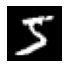

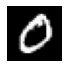

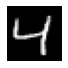

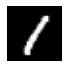

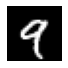

In [36]:
# draw a bunch
for d in mnist_data[:5]:
    plt.figure(figsize=(1,1))
    plt.imshow(d, cmap='gray')
    plt.axis('off')
    plt.show()

In [37]:

def get_label(idx):
    return mnist_labels[idx]


In [45]:
def draw_digit(data):
    plt.figure(figsize=(2,2))
    plt.imshow(data, cmap='gray')
    plt.axis('off')
    plt.show()

Samples count for digit 0: 5923.0


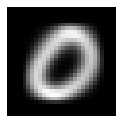

Samples count for digit 1: 6742.0


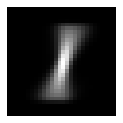

Samples count for digit 2: 5958.0


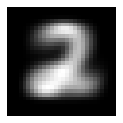

Samples count for digit 3: 6131.0


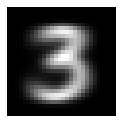

Samples count for digit 4: 5842.0


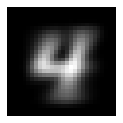

Samples count for digit 5: 5421.0


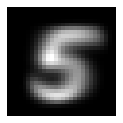

Samples count for digit 6: 5918.0


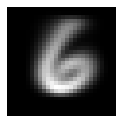

Samples count for digit 7: 6265.0


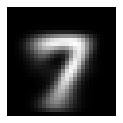

Samples count for digit 8: 5851.0


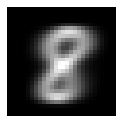

Samples count for digit 9: 5949.0


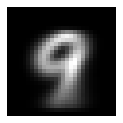

In [57]:
# squash all samples per class onto single image

squashed = []
samples_count_per_class = np.zeros(10) # also count samples per class
samples_count = len(mnist_data)

for i in range(10):
    squashed.append(np.zeros(shape=[28,28]))

for i, d in enumerate(mnist_data):
    digit = get_label(i)
    samples_count_per_class[digit] += 1
    s = squashed[digit]
    squashed[digit] = s + d / 256
    
for d in squashed:
    d = d / samples_count
    

for i, d in enumerate(squashed):
    print(f"Samples count for digit {i}: {samples_count_per_class[i]}")
    draw_digit(d)

(29, 28)


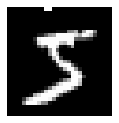

(29, 28)


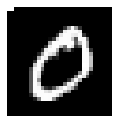

(29, 28)


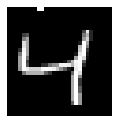

In [52]:
# add label as extra row in the image
label_rows = np.zeros(shape=[10,28])
for i in range(10):
    # 2 pixels per label 
    label_rows[i][i*2] = 255
    label_rows[i][i*2+1] = 255
    
# print(label_rows)

def get_input_with_label(idx):
    image = mnist_data[idx]
    digit = get_label(idx)
    label_row = label_rows[digit]
    return np.vstack([label_row, image])

for i in range(3):
    img = get_input_with_label(i)
    print(img.shape)
    draw_digit(img)
    